In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from collections import defaultdict

categories = {
    1: 'General trash',
    2: 'Paper',
    3: 'Paper pack',
    4: 'Metal',
    5: 'Glass',
    6: 'Plastic',
    7: 'Styrofoam',
    8: 'Plastic bag',
    9: 'Battery',
    10: 'Clothing'
}

data_dir = '/opt/ml/input/data'

In [2]:
# 추출할 json 경로 지정
file_name = 'train_all_sorted.json' #########지정해줄꺼 1##########
target_dir = data_dir + '/' + file_name

result = defaultdict(list)
target_json = json.load(open(target_dir))

## mask 사이즈 eda

In [3]:
for info in target_json['annotations']:
    category_id = info['category_id']
    area = info['area']

    result[categories[category_id]].append(area)


In [4]:
for k,v in result.items():
    result[k].sort()
    print(k,len(v))

Glass 610
Plastic bag 7643
Plastic 3090
General trash 2782
Metal 562
Paper 9311
Paper pack 659
Styrofoam 1343
Clothing 177
Battery 63


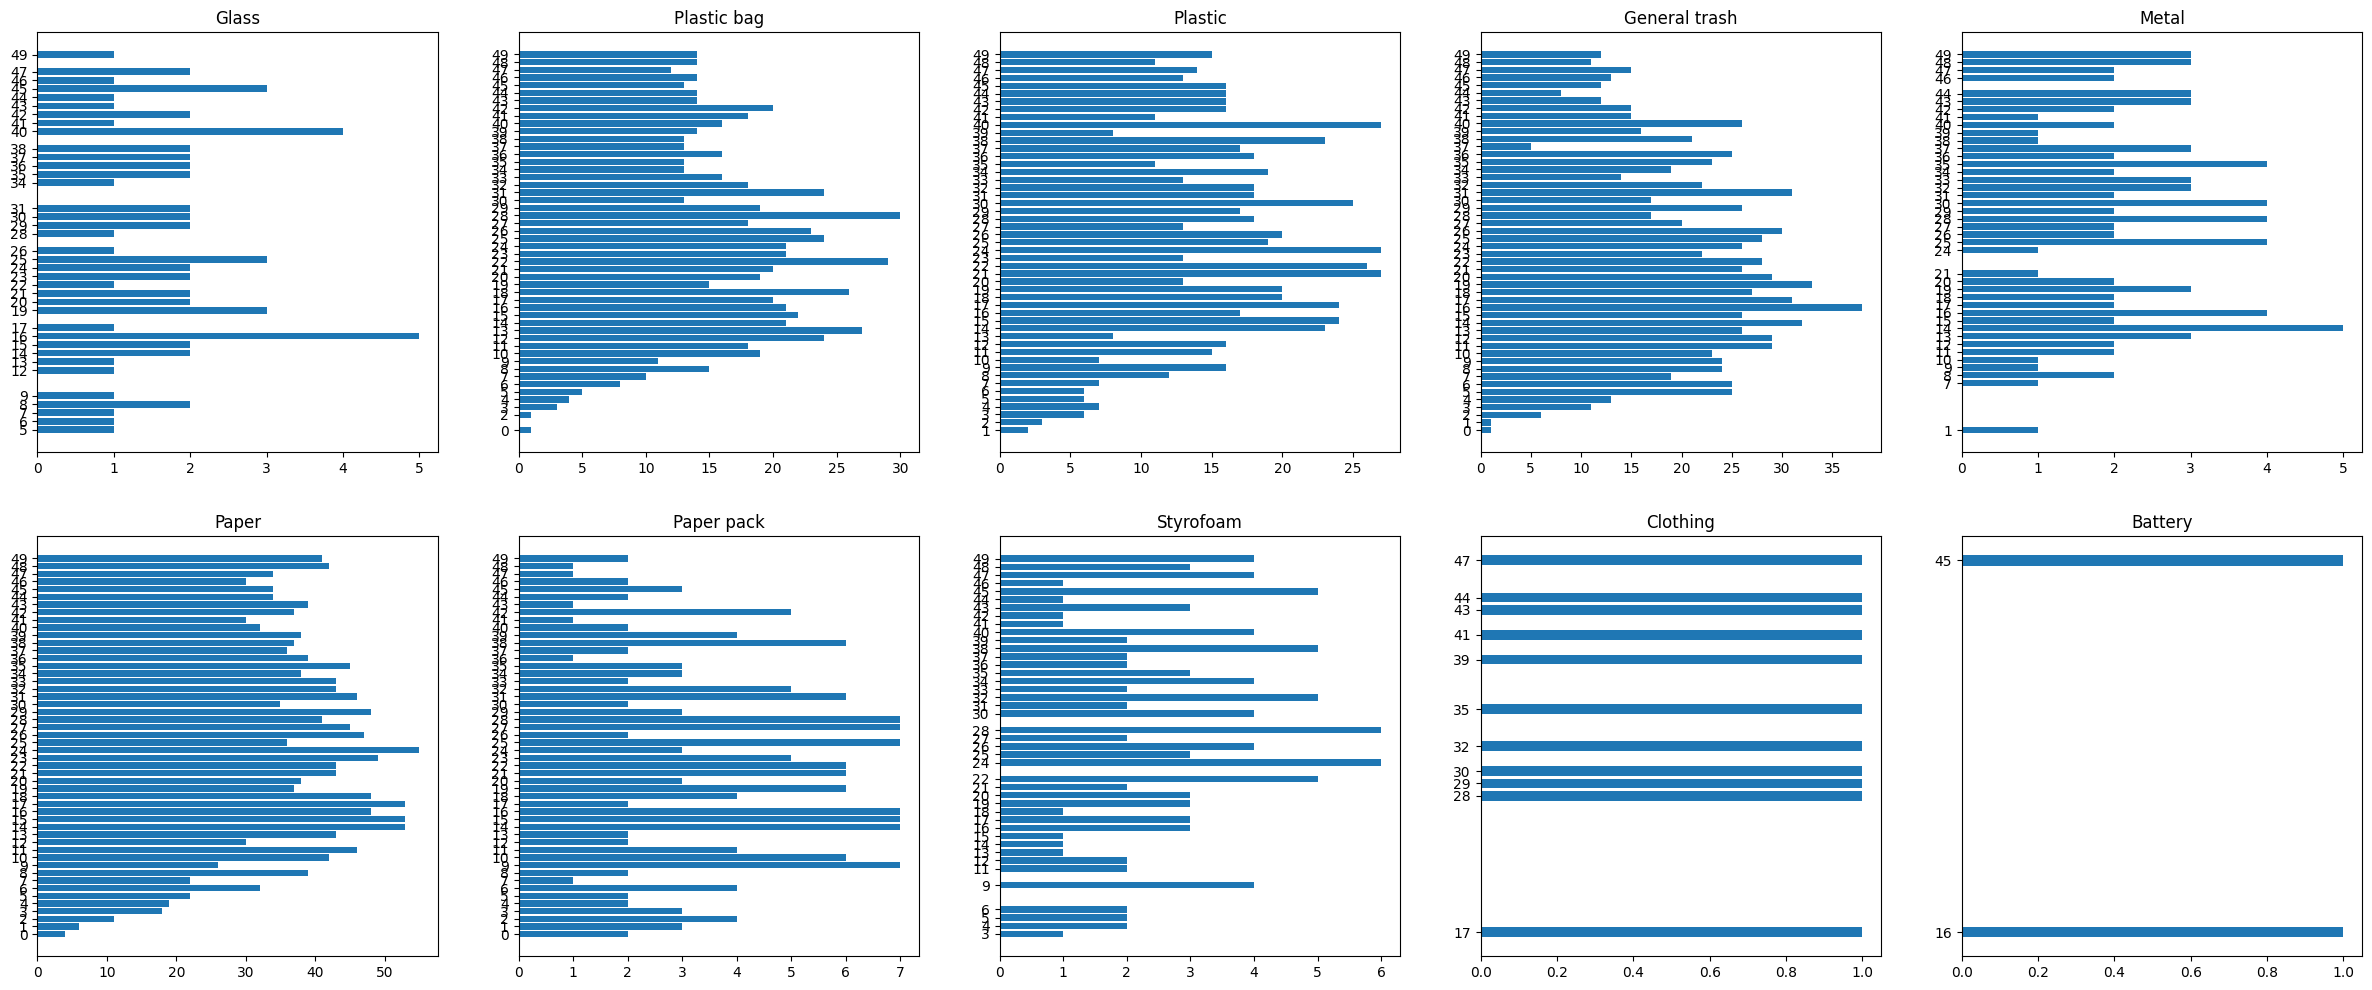

In [5]:
area = defaultdict(int)

div = 10
cut = 50

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))

for idx,k in enumerate(list(result.keys())):
    area = defaultdict(int)
    for i in range(len(result[k])):
        key = int(result[k][i] // div)
        key = key if key<cut else cut
        if key>=cut:
            continue
        area[key] += 1
    axes[idx//5][idx%5].set_title(k)
    axes[idx//5][idx%5].barh(list(area.keys()), list(area.values()))
    axes[idx//5][idx%5].set_yticks(list(area.keys()))


## 클래스별 이미지당 mask 개수

In [93]:
###### 추출하고 싶은 클래스만으로 json 생성해줌 #####
# 실행시간: 10초
# 사용법: 2가지만 지정해주면됨

# 추출할 json 경로 지정
file_name = 'train_all.json' #########지정해줄꺼 1##########
target_dir = data_dir + '/' + file_name


# 추출할 annotation 클래스명 추가: #########지정해줄꺼 2##########
class_name = 'Plastic bag'

target_json = json.load(open(target_dir))
target_coco = COCO(target_dir)

result = defaultdict(list)
for i in range(len(target_json['images'][:])):
    
    img_id = target_coco.getImgIds(imgIds=i)
    img_info = target_coco.loadImgs(img_id)[0]
    img_name = img_info['file_name']
    
    # annotation 불려오기
    ann_ids = target_coco.getAnnIds(imgIds=img_info['id'])
    anns = target_coco.loadAnns(ann_ids)

    # 클래스별로 anns 개수 저장
    temp = dict()
    for ann in anns:
        category_id = ann['category_id']
        temp[categories[category_id]] = len(anns)
    
    for k in list(temp.keys()):
        result[k].append(temp[k])
    
    ##################################################

result.keys()

loading annotations into memory...
Done (t=5.82s)
creating index...
index created!


dict_keys(['Plastic bag', 'Plastic', 'Glass', 'General trash', 'Metal', 'Paper', 'Paper pack', 'Styrofoam', 'Clothing', 'Battery'])

In [94]:
for k,v in result.items():
    result[k].sort()
    print(k,len(v))

Plastic bag 1863
Plastic 1142
Glass 202
General trash 1406
Metal 322
Paper 1760
Paper pack 417
Styrofoam 539
Clothing 114
Battery 19


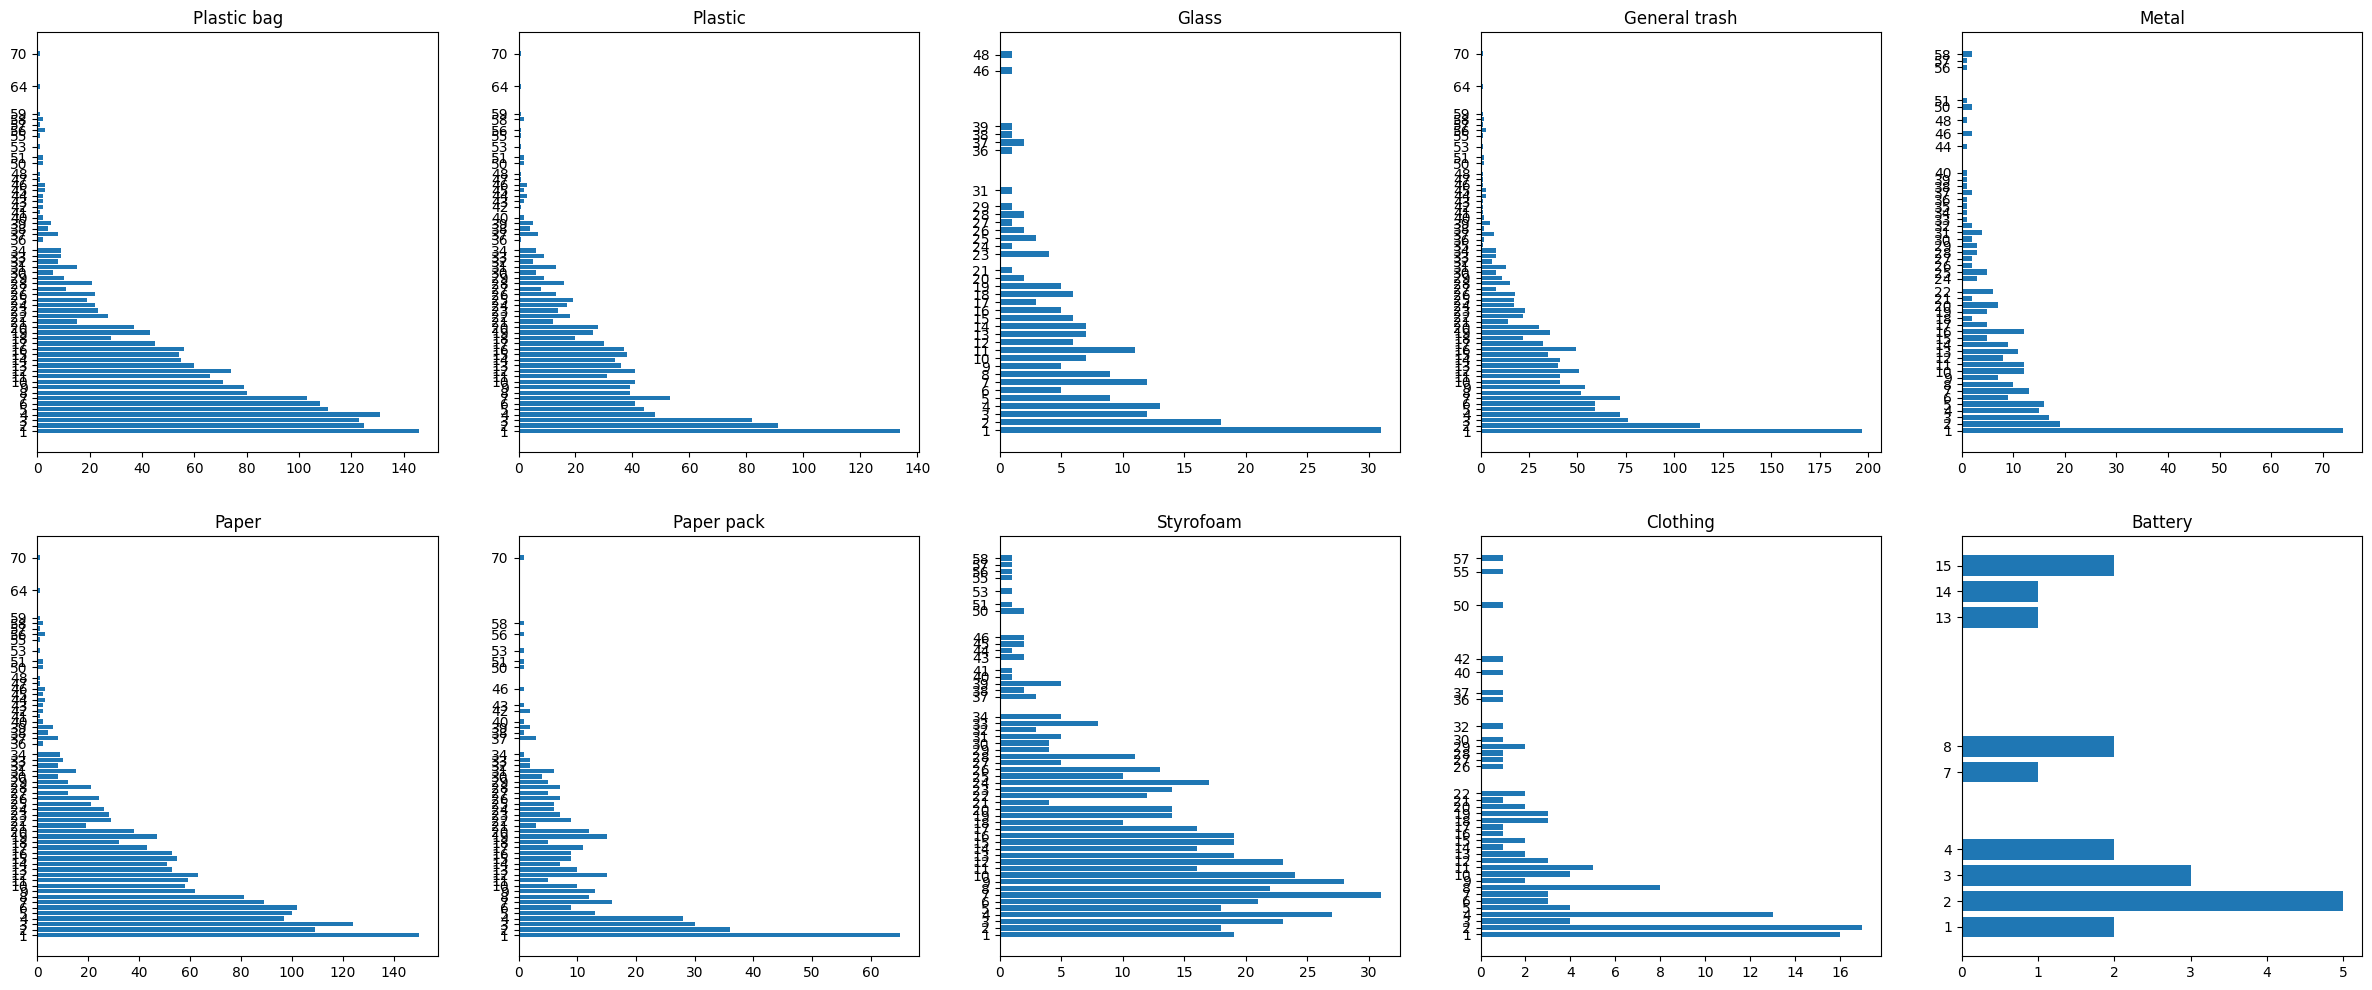

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))

for idx,k in enumerate(list(result.keys())):
    temp = defaultdict(int)
    for i in range(len(result[k])):
        key = int(result[k][i])
        
        temp[key] += 1
    axes[idx//5][idx%5].set_title(k)
    axes[idx//5][idx%5].barh(list(temp.keys()), list(temp.values()))
    axes[idx//5][idx%5].set_yticks(list(temp.keys()))


In [4]:
# 이미지별 annotation 개수

file_name = 'train_all.json' 
target_dir = data_dir + '/' + file_name


target_json = json.load(open(target_dir))
target_coco = COCO(target_dir)

result = []
for i in range(len(target_json['images'][:])):
    
    img_id = target_coco.getImgIds(imgIds=i)
    img_info = target_coco.loadImgs(img_id)[0]
    img_name = img_info['file_name']
    
    # annotation 불려오기
    ann_ids = target_coco.getAnnIds(imgIds=img_info['id'])
    anns = target_coco.loadAnns(ann_ids)

    # 클래스별로 anns 개수 저장
    temp = dict()
    for ann in anns:
        category_id = ann['category_id']
        temp[categories[category_id]] = len(anns)
    
    for k in list(temp.keys()):
        result.append(temp[k])
    
    ##################################################


loading annotations into memory...
Done (t=5.25s)
creating index...
index created!


[17,
 17,
 17,
 14,
 14,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 15,
 15,
 15,
 15,
 15,
 6,
 6,
 10,
 10,
 1,
 10,
 10,
 10,
 16,
 16,
 16,
 16,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 2,
 6,
 6,
 1,
 22,
 22,
 22,
 22,
 17,
 17,
 17,
 17,
 17,
 17,
 7,
 7,
 7,
 4,
 4,
 4,
 19,
 19,
 19,
 19,
 19,
 1,
 4,
 4,
 4,
 5,
 5,
 1,
 1,
 14,
 14,
 14,
 14,
 14,
 19,
 19,
 19,
 19,
 4,
 4,
 4,
 15,
 15,
 15,
 15,
 1,
 17,
 17,
 17,
 17,
 14,
 14,
 14,
 14,
 14,
 14,
 8,
 8,
 8,
 10,
 10,
 10,
 4,
 4,
 4,
 2,
 1,
 2,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 12,
 12,
 12,
 10,
 10,
 10,
 10,
 18,
 18,
 18,
 18,
 18,
 18,
 20,
 20,
 20,
 20,
 18,
 18,
 18,
 9,
 9,
 9,
 12,
 12,
 12,
 12,
 8,
 8,
 31,
 31,
 31,
 31,
 2,
 17,
 17,
 17,
 23,
 23,
 15,
 15,
 33,
 33,
 33,
 33,
 11,
 11,
 11,
 11,
 13,
 13,
 11,
 11,
 11,
 11,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 11,
 11,
 11,
 11,
 11,
 1,
 2,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 6,
 6,
 14,
 14,
 14,
 14,
 22,
 22,
 22,
 22,
 3,
 3

<BarContainer object of 58 artists>

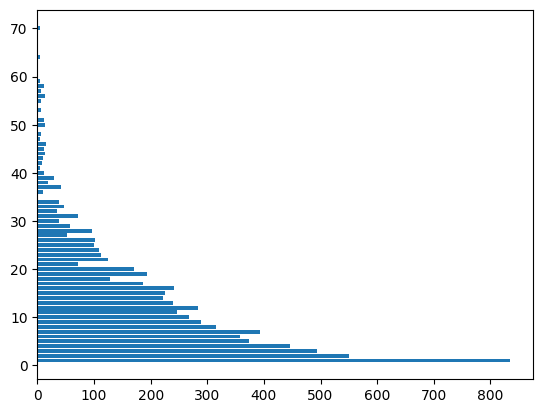

In [6]:
from collections import Counter

c = Counter(result)

plt.barh(list(c.keys()), list(c.values()))


In [7]:
len(result)

7784